In [ ]:
# 랭그래프
# https://langchain-ai.github.io/langgraph/reference/graphs/
#!pip install -U langgraph

In [3]:
# 랭스미스
from dotenv import load_dotenv
import os

load_dotenv('./../.env')

True

In [1]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2:1b", base_url="http://localhost:11434")

In [2]:
llm.invoke("Hello")

AIMessage(content='Hello. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-04-07T06:59:03.8615326Z', 'done': True, 'done_reason': 'stop', 'total_duration': 3913395700, 'load_duration': 3461919700, 'prompt_eval_count': 26, 'prompt_eval_duration': 286000000, 'eval_count': 18, 'eval_duration': 156000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-5d9d4057-af64-4658-bd28-2ef98b8b3f08-0', usage_metadata={'input_tokens': 26, 'output_tokens': 18, 'total_tokens': 44})

In [ ]:
class State(TypedDict):
    # {"messages": ["your message"]}
    messages: Annotated[list, add_messages]

def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

# 랭그래프 컴파일
graph = graph_builder.compile()

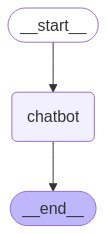

In [4]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
graph.invoke({"messages": ["What do you work?"]})

{'messages': [HumanMessage(content='What do you work?', additional_kwargs={}, response_metadata={}, id='7ea18048-5b13-4a3b-89a8-20ecc265dac8'),
  AIMessage(content='I\'m an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta AI."', additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-04-07T07:42:48.2293867Z', 'done': True, 'done_reason': 'stop', 'total_duration': 583517800, 'load_duration': 49624000, 'prompt_eval_count': 30, 'prompt_eval_duration': 3000000, 'eval_count': 23, 'eval_duration': 529000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-de1d9b9f-0caf-4ec5-9b79-5c13ea416306-0', usage_metadata={'input_tokens': 30, 'output_tokens': 23, 'total_tokens': 53})]}

In [7]:
graph.invoke({"messages": ["Hello", "my name is son"]})

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='830c82bb-956b-47aa-a046-4e05cf980fa9'),
  HumanMessage(content='my name is son', additional_kwargs={}, response_metadata={}, id='da97c796-857e-4858-94fa-4cd9aeebb26a'),
  AIMessage(content='Hello Son. How can I help you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-04-07T07:45:01.2562082Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1517346800, 'load_duration': 46578200, 'prompt_eval_count': 31, 'prompt_eval_duration': 4000000, 'eval_count': 11, 'eval_duration': 331000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-272ecdad-a6e3-408c-ab18-762f7ac40314-0', usage_metadata={'input_tokens': 31, 'output_tokens': 11, 'total_tokens': 42})]}

In [ ]:
while True:
    user_input = input("You: ")
    if user_input in ['q', 'quit', 'exit']:
        print("====END CHATBOT====")
        break

    # 랭그래프로 LLM에 전달
    response = graph.invoke({"messages": [user_input]})
    print("Assistant:", response["messages"][-1].content)

Assistant: Hello. Is there something I can help you with or would you like to chat?
Assistant: Here are three interesting facts about Earth:

1. **Earth is the only known planet in the universe with liquid water**: Liquid water is a crucial ingredient for life as we know it, and scientists believe that life may have originated on Earth due to this presence.

2. **The Great Barrier Reef is the largest living structure on Earth**: The Great Barrier Reef is a coral reef system in the Coral Sea, off the coast of Australia. It's estimated to be around 1,400 kilometers (870 miles) long and covers an area of approximately 344,400 square kilometers (133,000 square miles).

3. **Mount Everest takes about 6 months to reach the summit from its base**: The highest mountain on Earth is Mount Everest, located in the Himalayas between Nepal and Tibet. To reach the summit, climbers typically start their ascent around April or May, with some attempting to climb all the way up in a single season (June t